In [129]:
import pandas as pd



# Load the dataset using Pandas
df = pd.read_csv('adult.data.csv')  # Assuming there is no header row

# Print the first few rows of the DataFrame to inspect its structure
print(df.head())

# Assuming the target variable is the last column
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [130]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [132]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [133]:
X.shape

(32561, 14)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

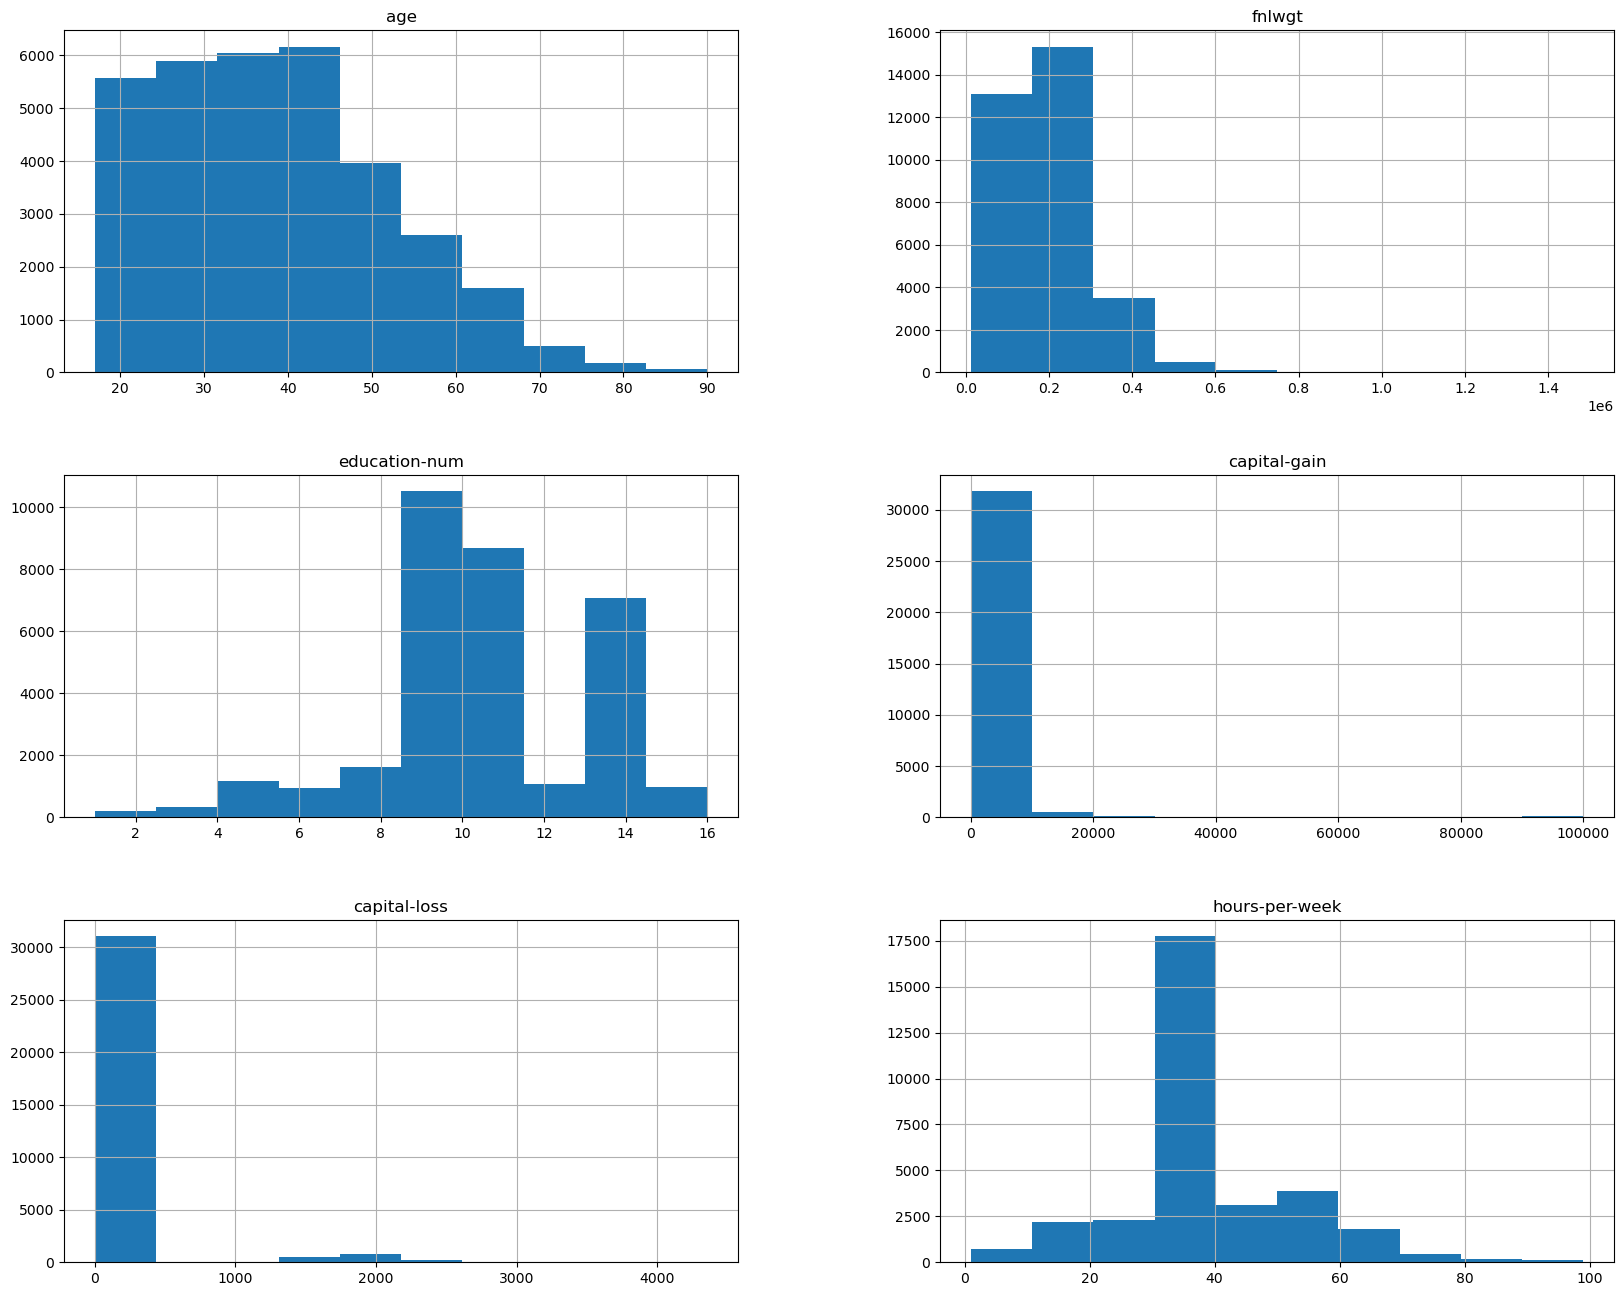

In [134]:
X.hist(figsize=(20, 16))

In [135]:
 X.isin(['?']).sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

In [136]:
X = X.replace('?', np.nan)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [138]:
num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
# num_cols.remove("G3")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [139]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [140]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [141]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [142]:
# Apply the preprocessing pipeline on the dataset

X_prepared = preprocessing.fit_transform(X)

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

X_prepared

,num__age,num__fnlwgt,num__education-num,num__capital-gain,num__capital-loss,num__hours-per-week,cat__workclass_Federal-gov,cat__workclass_Local-gov,cat__workclass_Never-worked,cat__workclass_Private,...,cat__native-country_Portugal,cat__native-country_Puerto-Rico,cat__native-country_Scotland,cat__native-country_South,cat__native-country_Taiwan,cat__native-country_Thailand,cat__native-country_Trinadad&Tobago,cat__native-country_United-States,cat__native-country_Vietnam,cat__native-country_Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [143]:
X_prepared.shape

(32561, 105)

In [144]:
#simple replacement and make it one group.
y.value_counts()


salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split
#splliting the test sets, display shapes
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(26048, 105) (26048,) (6513, 105) (6513,)


              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      4942
        >50K       0.62      0.61      0.62      1571

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.81      0.82      0.82      6513



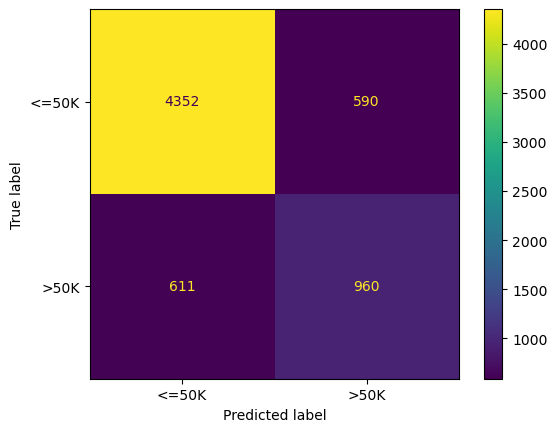

In [146]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#support vector
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train[:10000], y_train[:10000].values.ravel())
#predict y based on x test
y_predict = model_svm.predict(X_test)
print(classification_report(y_test, y_predict))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

In [147]:
from sklearn.model_selection import GridSearchCV
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(19536, 105) (19536,) (6512, 105) (6512,) (6513, 105) (6513,)


In [148]:

svm_parameters={'kernel': ['rbf'],
                'C': [0.01, 0.1, 1, 10],
                'gamma': [0.01, 1, 10]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
#best fit model and display the score
svm_winner=svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

0.8478194103194103

In [149]:
#showing the best fit model

svm_winner

SVC(C=10, gamma=0.01)